In [1]:
import pandas as pd
import requests
import io
pd.set_option('display.max_rows', None)

In [2]:
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-16.xls"

In [3]:
file = requests.get(url, stream=True)
df = pd.read_excel(io.BytesIO(file.content))
df = pd.read_excel(r"COVID-19-geographic-disbtribution-worldwide-2020-03-16.xls")

In [4]:
df.sample(5)

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
2150,2020-02-07,India,0,0.0,IN,NaN,Non-EU/EEA
2128,2020-02-29,India,0,0.0,IN,NaN,Non-EU/EEA
3394,2020-01-19,Netherlands,0,0.0,NL,NaN,EU
607,2020-03-10,Belgium,39,0.0,BE,NaN,EU
3811,2020-01-25,Pakistan,0,0.0,PK,NaN,Non-EU/EEA


In [5]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

In [8]:
shp_path = "ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp"
sf = shp.Reader(shp_path)

In [9]:
len(sf.shapes())

51

In [10]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df


df_map = read_shapefile(sf)

In [11]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

# comuna = 'SANTIAGO'
# com_id = df[df.NOM_COMUNA == comuna].index.get_values()[0]
# plot_shape(com_id, comuna)

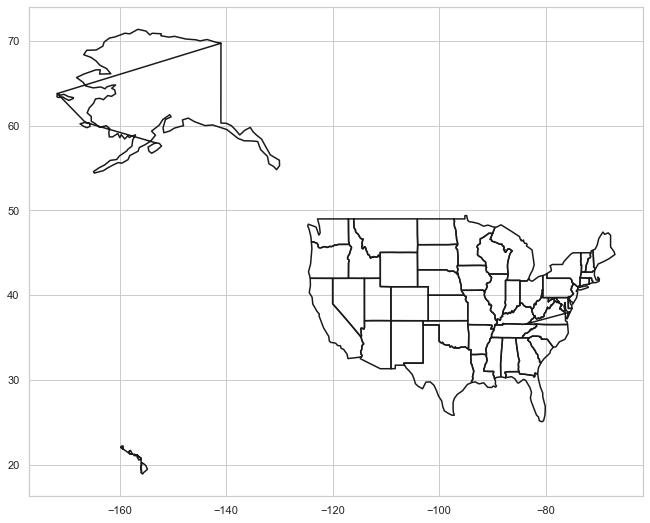

In [12]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')

#         if (x_lim == None) & (y_lim == None):
#             x0 = np.mean(x)
#             y0 = np.mean(y)
#             plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
plot_map(sf)

In [30]:
import geopandas as gpd

# shp_path = "ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp"
shp_path = "ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
# shp_path = "ne_10m_admin_1_states_provinces_lines/ne_10m_admin_1_states_provinces_lines.shp"
geo_shp = gpd.read_file(shp_path)

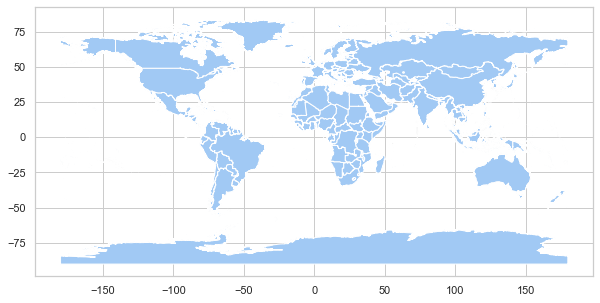

In [31]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
geo_shp.plot(ax=ax)
plt.show()

In [32]:
geo_shp.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,ì¸ëë¤ìì,IndonesiÃ«,Indonezja,IndonÃ©sia,ÐÐ½Ð´Ð¾Ð½ÐµÐ·Ð¸Ñ,Indonesien,Endonezya,Indonesia,å°åº¦å°¼è¥¿äº,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,ë§ë ì´ìì,MaleisiÃ«,Malezja,MalÃ¡sia,ÐÐ°Ð»Ð°Ð¹Ð·Ð¸Ñ,Malaysia,Malezya,Malaysia,é©¬æ¥è¥¿äº,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,ì¹ ë ,Chili,Chile,Chile,Ð§Ð¸Ð»Ð¸,Chile,Åili,Chile,æºå©,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,ë³¼ë¦¬ë¹ì,Bolivia,Boliwia,BolÃ­via,ÐÐ¾Ð»Ð¸Ð²Ð¸Ñ,Bolivia,Bolivya,Bolivia,ç»å©ç¶­äº,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,íë£¨,Peru,Peru,Peru,ÐÐµÑÑ,Peru,Peru,Peru,ç§é²,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [36]:
import geopandas as gpd

shp_path = "ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
#Read shapefile using Geopandas
gdf = gpd.read_file(shp_path)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,Argentina,ARG,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133..."
6,Dhekelia Sovereign Base Area,ESB,"POLYGON ((33.78094 34.97635, 33.76043 34.97968..."
7,Cyprus,CYP,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34..."
8,India,IND,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."
9,China,CHN,"MULTIPOLYGON (((78.91595 33.38766, 78.82426 33..."


In [37]:
import pandas as pd
file = requests.get(url, stream=True)
df = pd.read_excel(io.BytesIO(file.content))
df = pd.read_excel(r"COVID-19-geographic-disbtribution-worldwide-2020-03-16.xls")
df

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-16,Afghanistan,6,0.0,AF,NaN,Non-EU/EEA
1,2020-03-15,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
2,2020-03-11,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
3,2020-03-08,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
4,2020-03-02,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
5,2020-03-01,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
6,2020-02-29,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
7,2020-02-28,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
8,2020-02-27,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
9,2020-02-26,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA


In [43]:
country_codes = pd.read_csv(r"wikipedia-iso-country-codes.csv")

In [49]:
country_codes.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [45]:
gdf.head()

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [91]:
s = country_codes[country_codes["Alpha-3 code"] == "IDN"].iloc[0]["Alpha-2 code"]

In [92]:
s

'ID'

In [90]:
gdf["country_code"].map(lambda x: country_codes[country_codes["Alpha-3 code"] == x].iloc[0]["Alpha-3 code"])

IndexError: single positional indexer is out-of-bounds

In [ ]:
gdf["country_code_3"]

In [ ]:
#Merge dataframes gdf and df_2016.
merged = gdf.merge(df_2016, left_on = 'country_code', right_on = 'code')

In [19]:
from bokeh.plotting import figure, save

In [20]:
p = figure(title="My first interactive plot!")

shp_path = "shp_path/shp_path.shp"
geo_shp = gpd.read_file(shp_path)
geo_shp.sample(1)["geometry"]

DriverError: shp_path/shp_path.shp: No such file or directory

In [49]:
df_map[0:2]["coords"]

0    [(-58.200111852217844, -32.44712991235971), (-...
1    [(-58.20012361999997, -32.44720104199993), (-5...
Name: coords, dtype: object

In [44]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y
    

In [ ]:
geo_shp['x'] = geo_shp.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
geo_shp['y'] = geo_shp.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

In [ ]:
geo_df = geo_shp.drop('geometry', axis=1).copy()